In [9]:
import skimage
import matplotlib.pyplot as plt
import hyperspy.api as hs
import sys
sys.path.append('../..')
import util.crop

stack_num = 0 # The index of stacked image

# Change the name of s_load to load different plots.
# Note that some datasets are in stacks and their data will be 3-dimension,
# where the first dimention is the index of a single stacked image. We want to
# look at one image each of the time, so for those stacked images, please change
# stack_num to view different images.

# Load one file at a time.
# These commented files are some that I want think could be reevaluated later for references.
s_load = hs.load('../../data/images/Guodong YFO/YFO_083023/Pristine_YFO.dm3')

if len(s_load.data.shape) == 2: # Non-stacked
    print("Non-Stacked")
    s = s_load
else: # Stacked, where s_load.data.shape = 3
    print("Stacked")
    s = s_load.inav[stack_num]

# Plot the image in pixels. We can plot in nanometers by simply doing s.plot().
import copy
s_copy = copy.deepcopy(s)
for ax in s_copy.axes_manager.signal_axes:
    ax.scale = 1.0
    ax.offset = 0.0

# plt.close()
# s_copy.plot()
s.metadata

Non-Stacked


├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.3.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2025-12-16T14:27:32.041404-06:00
│   ├── original_filename = Pristine_YFO.dm3
│   └── title = 
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = -0.0
    ├── quantity = Intensity
    └── signal_type =

In [3]:
import scipy.signal
import numpy as np

left_bound = 500 # TUNE THIS
right_bound = 1700 # TUNE THIS
start_pixel = 280 # TUNE THIS
end_pixel = 1400 # TUNE THIS
# window_height_nm = None

crop = util.crop.Crop(s, left_bound, right_bound, start_pixel, end_pixel)

crop.build_grid_dict()
crop.get_atom_positions()
# crop.refine_atom_positions()
positions_array = np.array(list(crop.atom_positions.values()))

In [12]:
crop.get_nn_intensities()
crop.get_nn_displacements()
crop.get_atom_types()

## Bayesian Prediction Model
Bayesian problem statement:

Prediction of defect probability: $P(d|M) = \Sigma_i P(d_i|M)$

Prediction of defect in $j$-th layer probability: $P(d_j|M) = P(M|d_j)P(d_j)/\Sigma_i(P(M|d_i)P(d_i))$

Prior: $P(d_j) = c(1-c)^{n-1}$
* $c$: total probability of defect existance
* $n$: total number of layers

Likelihood: $P(M|d_j) = \Pi_k(P(M_k|d_j))$

$k$-th Feature: $M_k$


### Dummy test example
Pick only one feature for likelihood.
* mean intensity difference with Gaussian difference

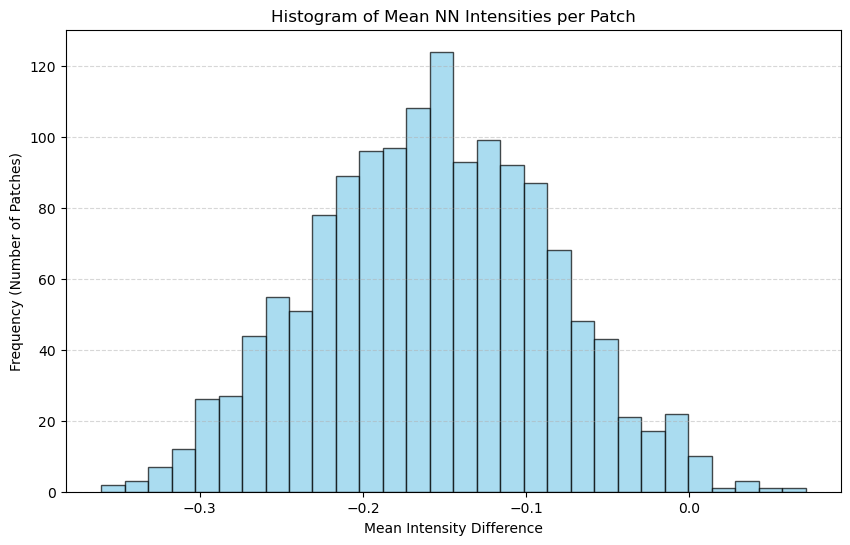

In [ ]:
patch_means = []

for patch in crop.grid.values():
    # Ensure data exists and is not empty before calculating mean
    if patch.nn_intensity_differences is not None and patch.atom_type == 'Lu':
        mean_val = np.mean(patch.nn_intensity_differences)
        patch_means.append(mean_val)

plt.figure(figsize=(10, 6))
plt.hist(patch_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram of Mean NN Intensities per Patch')
plt.xlabel('Mean Intensity Difference')
plt.ylabel('Frequency (Number of Patches)')
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.show()

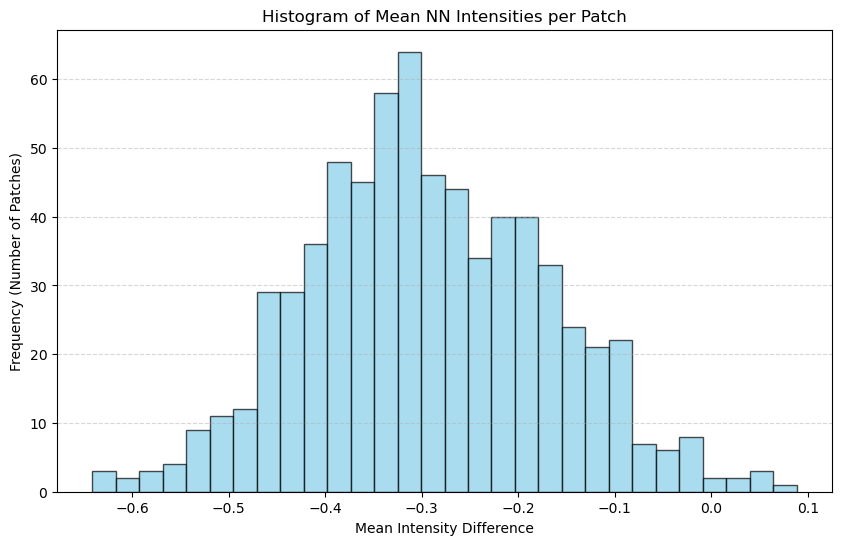

In [33]:
patch_means = []

for patch in crop.grid.values():
    # Ensure data exists and is not empty before calculating mean
    if patch.nn_intensity_differences is not None and patch.atom_type == 'Lu':
        if patch.nn_intensity_differences[1] > -0.3:
            mean_val = patch.nn_intensity_differences[0]
            patch_means.append(mean_val)

plt.figure(figsize=(10, 6))
plt.hist(patch_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram of Mean NN Intensities per Patch')
plt.xlabel('Mean Intensity Difference')
plt.ylabel('Frequency (Number of Patches)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()